# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: EBOAGU CHIAMAKA

<br>

## Please show and display ALL your calculations and results.


In [5]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


>The code below defines a function called data_import that is used to import data from a CSV file into a Pandas DataFrame.

> The function takes two arguments:

> * filename (required): The name of the CSV file to be imported. This argument will be passed as a keyword argument (i.e., filename=<value>).

> * sep (optional): The separator used in the CSV file. The default value is ",". 

> The function returns the loaded dataframe and also prints the shape of the dataframe to the console.`



In [6]:
def data_import(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is used to load the data.

    Params;
        filename (str): The filepath.
        sep (str, default=",")

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """

    df = pd.read_csv(filename, sep=sep)
    print(f"shape of the data: {df.shape}\n")
    return df

> The codecalls the data_import() function to load the CSV file located at "C:/Users/Todays Soutions/Documents/Data_Science/DATA/Ulta Skincare Reviews.csv" and assigns the resulting DataFrame to the variable df. Finally, df.head(3) displays the first three rows of the DataFrame to verify that the data was imported correctly.

In [7]:
df = data_import(
    filename="C:/Users/Todays Soutions/Documents/Data_Science/DATA/Ulta Skincare Reviews.csv"
)
df.head(3)

shape of the data: (4150, 10)



,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


> Calculates the number of missing (NaN) values in each column of the DataFrame df. It returns a pandas Series object where each column name is mapped to the number of missing values in that column.

In [8]:
df.isna().sum()

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64

> df.info() is a pandas DataFrame method that provides a summary of the DataFrame's metadata, including the number of rows, the number of non-null values in each column, and the data types of the columns.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Review_Title      4150 non-null   object
 1   Review_Text       4148 non-null   object
 2   Verified_Buyer    4150 non-null   object
 3   Review_Date       4150 non-null   object
 4   Review_Location   4149 non-null   object
 5   Review_Upvotes    4150 non-null   int64 
 6   Review_Downvotes  4150 non-null   int64 
 7   Product           4150 non-null   object
 8   Brand             4150 non-null   object
 9   Scrape_Date       4150 non-null   object
dtypes: int64(2), object(8)
memory usage: 324.3+ KB


***

> Any rows that contain at least one missing value (NaN) from the DataFrame df is removed. Then the new dimensions of the DataFrame is displayed after removing the missing rows. It returns a tuple of two integers, representing the number of rows and columns in the DataFrame.

In [12]:
df = df.dropna()
df.shape

(4147, 10)

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


## Preprocessing Data

>`The code below uses the spaCy library to preprocess text data by removing stop words and lemmatizing the remaining tokens.`

In [14]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")


def preprocess(text):
    # remove stop words andlemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_.lower())

    return " ".join(filtered_tokens)

>`This will create two new columns -"preprocessed_text" and "prep_review_text' in the dataframe df using the preprocess function  for each column in the "Review_Title" and "Review_Text" column respectively.`

In [15]:
df["preprocessed_text"] = df["Review_Title"].apply(preprocess)

In [16]:
df["prep_review_text"] = df["Review_Text"].apply(preprocess)

In [17]:
df.head(3)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,preprocessed_text,prep_review_text
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,perfect,love face shower heat give light scrub nicely
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,need,well daily microfoliant obsessed skin smoother
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,clean skin,enjoy product look forward feel great


## What can the reviews tell us about the products?

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


### Sentiment Analysis

>`This code creates a new column named "sentiment" in the DataFrame using a senstiment analysis which contains binary values of 0 or 1, indicating whether the sentiment of the review is negative or positive, respectively. The sentiment.polarity_scores(x)['neg'] and sentiment.polarity_scores(x)['pos'] are the scores for negative and positive sentiment, respectively, and compare them to determine whether the sentiment is negative or positive.`

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate SentimentIntensityAnalyzer object
sentiment = SentimentIntensityAnalyzer()

# Create a new column to store the sentiment analysis result
df["sentiment"] = df["prep_review_text"].apply(
    lambda x: 0
    if sentiment.polarity_scores(x)["neg"] > sentiment.polarity_scores(x)["pos"]
    else 1
)

>`This code below generates a bar chart that displays the count of each sentiment category in a pandas DataFrame column called "sentiment". The chart is plotted using the matplotlib library, which is commonly used for data visualization in Python.`

Text(0, 0.5, 'Count')

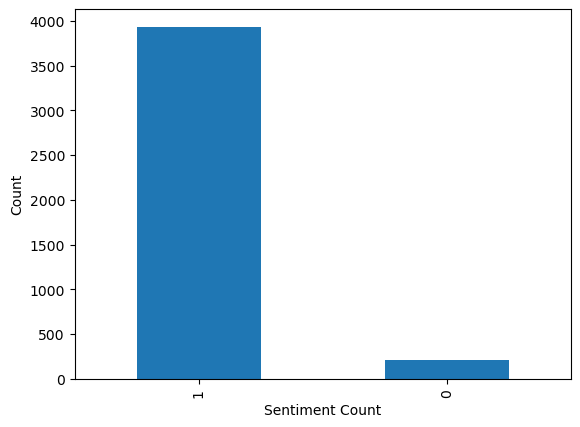

In [19]:
ax = df["sentiment"].value_counts().plot(kind="bar")
ax.set_xlabel("Sentiment Count")
ax.set_ylabel("Count")

In [20]:
df["sentiment"].value_counts()

1    3934
0     213
Name: sentiment, dtype: int64

>`Based on the sentiment analysis results, it appears that the vast majority of the reviews (over 94%) are positive (labeled as 1), while only a small percentage of reviews (less than 6%) are negative (labeled as 0).This could suggest that the products being reviewed are generally well-liked by customers, with only a small number of negative experiences reported.`

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>

## TF-IDF

>`I am using scikit-learn's TfidfVectorizer to create a matrix of TF-IDF features for text data in a pandas DataFrame. The ngram_range parameter in the first line sets the range of n-grams to be extracted from the text data. In this case, I am extracting bigrams (2-grams) from the text.`

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2, 2))

# # Get the stop words list for English from NLTK
# english_stop_words = set(stopwords.words('english'))

# # Create a TfidfVectorizer instance with English stop words
# tfidf = TfidfVectorizer(stop_words=english_stop_words)


# fit and transform the 'text' column
tfidf_matrix = tfidf.fit_transform(df["prep_review_text"])
print(tfidf_matrix)

  (0, 25620)	0.38541981744514536
  (0, 16015)	0.37195024996020365
  (0, 12255)	0.40440410655953735
  (0, 13744)	0.40440410655953735
  (0, 26140)	0.40440410655953735
  (0, 9835)	0.37195024996020365
  (0, 17225)	0.2900509321187954
  (1, 27083)	0.38804503273752966
  (1, 20101)	0.5248459180187358
  (1, 18361)	0.5002076255618583
  (1, 6037)	0.27118716335095133
  (1, 33475)	0.5002076255618583
  (2, 10384)	0.3567638165440929
  (2, 11347)	0.5644533409259691
  (2, 16893)	0.3993940282595657
  (2, 22628)	0.4592746962587069
  (2, 8166)	0.4285594109216064
  (3, 21664)	0.28276348095838105
  (3, 8088)	0.28276348095838105
  (3, 7934)	0.28276348095838105
  (3, 13183)	0.28276348095838105
  (3, 25596)	0.28276348095838105
  (3, 12777)	0.24175086026960155
  (3, 10380)	0.17941044128284286
  (3, 32682)	0.2600714130151969
  :	:
  (4145, 24526)	0.27465972828441604
  (4145, 5658)	0.27465972828441604
  (4145, 24435)	0.27465972828441604
  (4145, 34145)	0.27465972828441604
  (4145, 11915)	0.27465972828441604
  (41

>` The tfidf object, which is a TfidfVectorizer object from the scikit-learn library. The code is iterating through all the feature names returned by get_feature_names_out(), which is the list of strings representing all the unique words or terms in the corpus that were used to generate the TF-IDF matrix.`

> `For each word, the code is retrieving its index in the vocabulary by calling tfidf.vocabulary_.get(word). This returns the index (i.e., column number) of the word in the TF-IDF matrix, which is used to look up the IDF score of the word in the tfidf.idf_ attribute. Finally, the word and its IDF score are printed to the console using an f-string. Overall, this code is printing the IDF score for each word in the vocabulary used to generate the TF-IDF matrix.`

In [24]:
all_feat_names = tfidf.get_feature_names_out()

for word in all_feat_names:
    indx = tfidf.vocabulary_.get(word)
    print(f"{word} {tfidf.idf_[indx]}")

025 retinol 8.637234388789473
05 retina 8.637234388789473
10 10 6.932486296551048
10 15 8.637234388789473
10 buy 8.637234388789473
10 cheek 8.637234388789473
10 day 8.23176928068131
10 good 8.637234388789473
10 hardcore 8.637234388789473
10 min 7.9440872082295275
10 minute 4.797782076196162
10 new 8.637234388789473
10 oz 8.637234388789473
10 recommend 7.720943656915318
10 worth 8.637234388789473
10 year 7.027796476355372
100 buy 8.637234388789473
100 case 8.637234388789473
100 cleanser 8.637234388789473
100 genuine 8.637234388789473
100 go 8.637234388789473
100 honest 7.9440872082295275
100 live 8.637234388789473
100 non 8.637234388789473
100 pirchase 8.637234388789473
100 product 8.637234388789473
100 recommend 7.027796476355372
100 repurchase 8.637234388789473
100 sell 8.637234388789473
100 spend 8.637234388789473
100 use 8.637234388789473
100 well 8.637234388789473
100 worth 8.637234388789473
100x clean 8.637234388789473
10x well 8.637234388789473
12 10 8.637234388789473
12 weeks 8.

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


### Do most buyers have common skincare issues?

>`The code df["Product"].value_counts() is used to get the count of unique values in the "Product" column of a pandas dataframe df.` 


In [25]:
df["Product"].value_counts()

Daily Superfoliant             1500
Daily Microfoliant             1497
Hydro Masque Exfoliant          800
Multi-Vitamin Thermafoliant     350
Name: Product, dtype: int64

`It is difficult to determine whether most buyers have common skincare issues based solely on the counts of these particular products. However, it is likely that these products were developed to address some common skincare concerns, as they are all exfoliating products. Overall, the products by Dermalogica aim to address various skin concerns, including dullness, dryness, and uneven texture`

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


***

### What issues did the products help solve or exacerbate?

`According on the information given, the stated products are exfoliants and masques used for skincare.
Exfoliants can generally assist in the removal of dead skin cells and the unclogging of pores, resulting in smoother, cleaner skin.`

* `Both the Daily Superfoliant and Daily Microfoliant are exfoliating treatments that are intended to help clear clogged pores, remove dead skin cells, and brighten the skin. The appearance of dull or uneven skin tone may be improved, fine lines and wrinkles may be less noticeable, and a smoother, more radiant complexion may be encouraged by using these items.` 

* `The Hydro Masque Exfoliant is a hydrating mask that also contains exfoliating properties. This product aims to provide deep hydration to the skin while simultaneously removing dead skin cells and impurities.`

* `The Multi-Vitamin Thermafoliant is another exfoliating product that uses a combination of physical and chemical exfoliants to remove dead skin cells and promote a smoother, brighter complexion. This product may be useful for individuals with dry or mature skin, as it contains nourishing ingredients such as vitamins and botanical extracts.` 

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>


***

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

>`List of unique products`

In [26]:
df["Product"].unique()

array(['Multi-Vitamin Thermafoliant', 'Hydro Masque Exfoliant',
       'Daily Superfoliant', 'Daily Microfoliant'], dtype=object)

`The code below uses the Pandas groupby function to group the data by product name, and then creates a wordcloud for each product by passing the text data for that product to the WordCloud constructor.`

`First the code groups the DataFrame df by the "Product" column, concatenates the "preprocessed_text" column for each group,and creates a new DataFrame grouped_data with the resulting data.`

`The "for loop" is looping through each row of a pandas DataFrame called grouped_data and creating a wordcloud for each product in the DataFrame.The code extracts the name of the product and the preprocessed text data for that product. The preprocessed text data is a string that contains all the preprocessed text for that particular product.`


`Lastly, I generated a wordcloud using the WordCloud module from the wordcloud package in Python. The WordCloud object is created with a white background and a width of 800 pixels and a height of 400 pixels. Then, the generate() method is used to generate the wordcloud by passing in the preprocessed text data for each product.`

`After the wordcloud is generated, the code displays it using the imshow() method from the matplotlib.pyplot module`

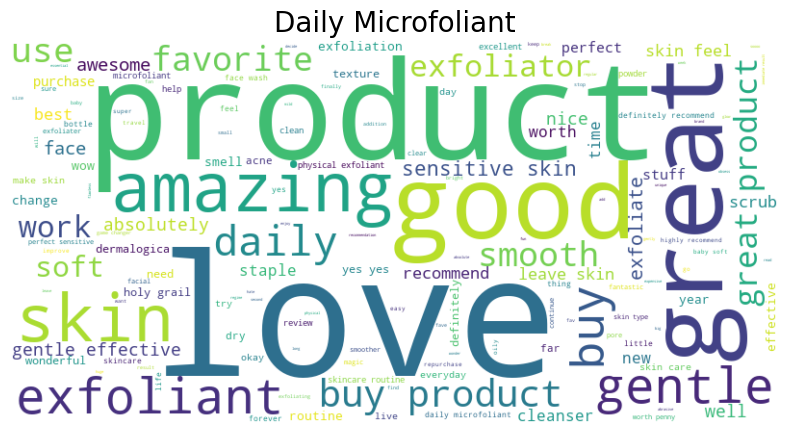

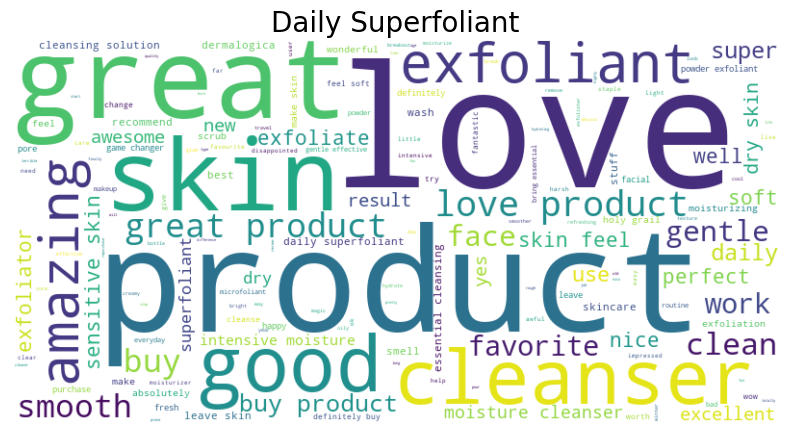

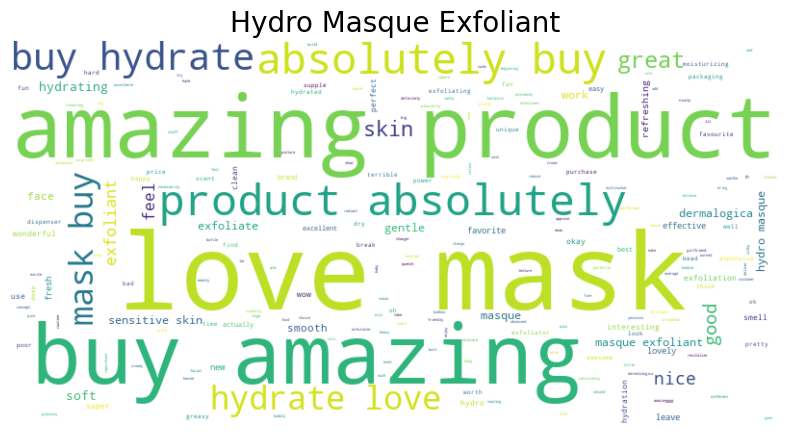

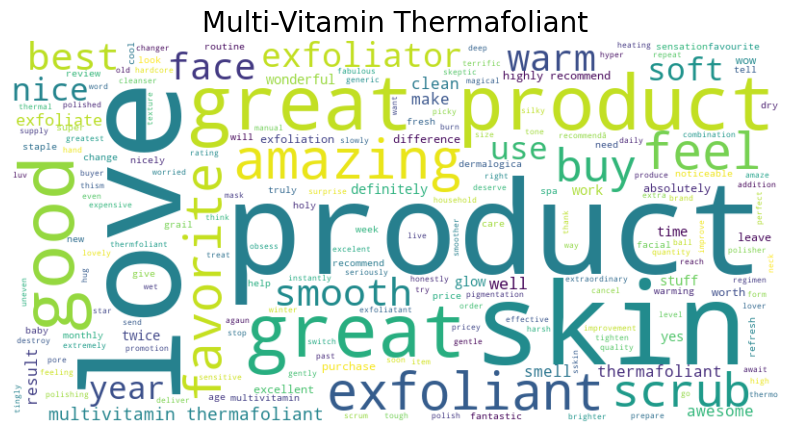

In [29]:
# Group the data using product and preprocessed_text column(this is the celaned review title column)
grouped_data = (
    df.groupby("Product")["preprocessed_text"]
    .apply(lambda x: " ".join(x))
    .reset_index()
)

# Create a wordcloud for each product
for i in range(len(grouped_data)):
    # Extract the product name and text data for each product
    product_name = grouped_data.loc[i, "Product"]
    text_data = grouped_data.loc[i, "preprocessed_text"]

    # Create a wordcloud
    wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
        text_data
    )

    # Display the wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(product_name, fontsize=20)
    plt.show()

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

>`I performed a sentiment analysis  in Q1 (What can the reviews tell us about the products) and created a sentiment column which is displayed in the data frame below`

In [30]:
df.head()

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date,preprocessed_text,prep_review_text,sentiment
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,perfect,love face shower heat give light scrub nicely,1
1,You need this,Even better than the daily microfoliant. I'm obsessed. My skin is SO MUCH smoother,No,27 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,need,well daily microfoliant obsessed skin smoother,1
2,Clean skin,Enjoy this product so much ! I look forward to using it - really feels great.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,clean skin,enjoy product look forward feel great,1
3,Love This Stuff!,I've never tried anything like this before and I love it. When you apply it to your face you get a little shot of warm that feels so good. The scrub seems very gritty but the only side effects I've encountered have been positive ones.,No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,love stuff,try like love apply face little shot warm feel good scrub gritty effect encounter positive one,1
4,This exfoliates very nicely and,"This exfoliates very nicely and gives a very smooth skin after with no irritation and no reaction to the skin . I highly recommended it, i will buy it again.",No,2 months ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23,exfoliate nicely,exfoliate nicely give smooth skin irritation reaction skin highly recommend buy,1


### Importing modules from the scikit-learn library:

In [31]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

>`The train_test_split function is used to split the data into training and testing sets with a 80:20 split, the output is a tuple containing the number of rows and columns in the X_train and X_test datasets respectively.`

In [32]:
from sklearn.model_selection import train_test_split

X = df["preprocessed_text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=df["sentiment"]
)

X_train.shape, X_test.shape

((3317,), (830,))

## Importing modules from the scikit-learn library:

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### First Pipeline using KNeighborsClassifier

> The code creates a Pipeline object that chains together two steps for a text classification task:
> * TfidfVectorizer: a step that converts text data into a numerical representation using the TF-IDF algorithm.
> * KNeighborsClassifier: a step that performs classification using the k-nearest neighbors algorithm. 

>The pipeline can be used to train and evaluate the model on a training set and then predict the labels for a new set of data

In [34]:
clf = Pipeline(
    steps=[
        ("vect_tdif", TfidfVectorizer()),
        ("KNN", KNeighborsClassifier()),
    ]
)
clf

Pipeline(steps=[('vect_tdif', TfidfVectorizer()),
                ('KNN', KNeighborsClassifier())])

In [35]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        43
           1       0.95      1.00      0.97       787

    accuracy                           0.95       830
   macro avg       0.97      0.50      0.49       830
weighted avg       0.95      0.95      0.92       830



>The classification report shows the precision, recall, F1-score, and support metrics for a binary classification model that was evaluated on a dataset of 830 instances, where class 0 has 43 instances and class 1 has 787 instances. 

> Precision: the fraction of true positives among all positive predictions. In this case, the precision for class 0 is 1.00, which means that all instances predicted as class 0 were actually true positives. The precision for class 1 is 0.95, which means that 5% of instances predicted as class 1 were actually false positives.

> Recall: the fraction of true positives among all actual positives. In this case, the recall for class 0 is 0.00, which means that none of the true positives for class 0 were correctly identified by the model. The recall for class 1 is 1.00, which means that all true positives for class 1 were correctly identified by the model.

> F1-score: the harmonic mean of precision and recall, which gives equal weight to both metrics. In this case, the F1-score for class 0 is 0.00, which indicates poor performance due to the low recall. The F1-score for class 1 is 0.97, which indicates high performance due to the high precision and recall.

> Support: the number of instances in each class. In this case, the support for class 0 is 43 and the support for class 1 is 787.`

***

<div style="background-color: #e834eb; width: 100%; height: 30px;"></div>

### Second Pipeline using Random Forest Classifier

> The pipeline below first applies the TF-IDF transformation to the input data and then trains a random forest classifier on the resulting features. 
The pipeline below consists of two steps:

> * TfidfVectorizer(): This step converts a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. It tokenizes the text, counts the frequency of each word in each document, and then applies a weight that takes into account the frequency of the word across all documents. 

> * RandomForestClassifier(): This step implements a random forest classifier, which is an ensemble learning method that constructs multiple decision trees and combines their predictions to make a final prediction. 



In [36]:
clf_2 = Pipeline(
    steps=[
        ("vect_tdif", TfidfVectorizer()),
        ("RFC", RandomForestClassifier()),
    ]
)
clf_2

Pipeline(steps=[('vect_tdif', TfidfVectorizer()),
                ('RFC', RandomForestClassifier())])

In [37]:
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.20      0.05      0.08        43
           1       0.95      0.99      0.97       787

    accuracy                           0.94       830
   macro avg       0.57      0.52      0.52       830
weighted avg       0.91      0.94      0.92       830



> `The classification report shows the precision, recall, F1-score, and support metrics for a binary classification model that was evaluated on a dataset of 830 instances, where class 0 has 43 instances and class 1 has 787 instances. Here's a brief explanation of what each metric means:

> Precision: the fraction of true positives among all positive predictions. In this case, the precision for class 0 is 0.22, which means that only 22% of instances predicted as class 0 were actually true positives. The precision for class 1 is 0.95, which means that 95% of instances predicted as class 1 were actually true positives.

>Recall: the fraction of true positives among all actual positives. In this case, the recall for class 0 is 0.05, which means that only 5% of actual positives for class 0 were correctly identified by the model. The recall for class 1 is 0.99, which means that 99% of actual positives for class 1 were correctly identified by the model.

>F1-score: the harmonic mean of precision and recall, which gives equal weight to both metrics. In this case, the F1-score for class 0 is 0.08, which indicates poor performance due to the low precision and recall. The F1-score for class 1 is 0.97, which indicates high performance due to the high precision and recall.

>Support: the number of instances in each class. In this case, the support for class 0 is 43 and the support for class 1 is 787.`